In [7]:
%load_ext autoreload
%autoreload 2

from pyba.CameraNetwork import CameraNetwork
import pickle
import glob
import numpy as np
from pyba.config import df3d_colors, df3d_bones

#image_path = '/home/user/Desktop/DeepFly3D/sample/test/camera_{cam_id}_img_{img_id}.jpg'
#pr_path = '/home/user/Desktop/DeepFly3D/sample/test/df3d/df3d_result*.pkl'


image_path = '/mnt/NAS/GO/7cam/220112_aJO-GAL4xUAS-CsChr/Fly002/001_LA/behData/images/camera_{cam_id}_img_{img_id}.jpg'
pr_path = '/mnt/NAS/GO/7cam/220112_aJO-GAL4xUAS-CsChr/Fly002/001_LA/behData/images/df3d2/df3d_result*.pkl'

d = pickle.load(open(glob.glob(pr_path)[0], 'rb'))
points2d = d['points2d']

# df3d points2d are saved in normalized into [0,1], rescale them into image shape
camNet = CameraNetwork(points2d=points2d*[480, 960], calib=d, image_path=image_path, bones=df3d_bones, colors=df3d_colors)

#image_path = '/mnt/nas/GO/7cam/220112_aJO-GAL4xUAS-CsChr/Fly002/001_LA/behData/images/camera_{cam_id}_img_{img_id}.jpg'
#pr_path = '/mnt/nas/GO/7cam/220112_aJO-GAL4xUAS-CsChr/Fly002/001_LA/behData/images/df3d/df3d_result*.pkl'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 'points3d', 'points2d', 'points3d_wo_procrustes', 'camera_ordering', 'heatmap_confidence'])

In [12]:
pr_path = './df3d_result__mnt_nas_GO_7cam_220112_aJO-GAL4xUAS-CsChr_Fly002_001_LA_behData_images.pkl'
d = pickle.load(open(glob.glob(pr_path)[0], 'rb'))


In [13]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 'points3d', 'points2d', 'points3d_wo_procrustes', 'camera_ordering'])

In [10]:
for c in camNet:
    c.fx = c.fx * 1.2
    c.fy = c.fy * 1.2

_ = camNet.triangulate()

(-0.5, 6719.5, 479.5, -0.5)

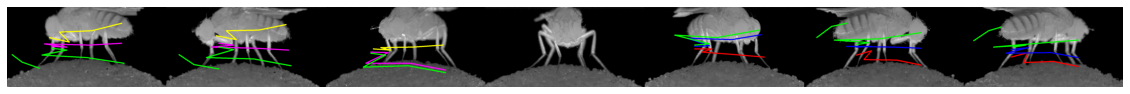

In [8]:
import matplotlib.pyplot as plt
img = camNet.plot_2d(0, points='points2d')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')


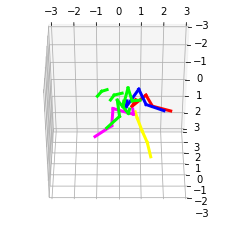

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax_3d = fig.add_subplot(111, projection='3d')

camNet.plot_3d(ax_3d, 0, thickness=3)
ax_3d.view_init(-50, -120+ 30)


(-0.5, 6719.5, 479.5, -0.5)

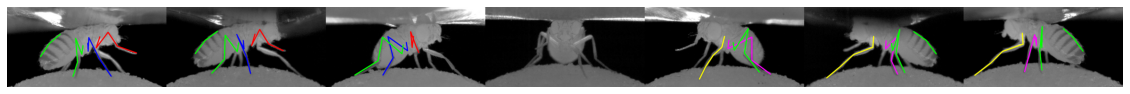

In [10]:
import matplotlib.pyplot as plt
img = camNet.plot_2d(0, points='reprojection')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')

In [52]:
camNet.bundle_adjust(update_intrinsic=False, update_distort=False)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5698e+04                                    2.70e+05    
       1              2         2.3561e+04      1.21e+04       1.72e+00       5.12e+03    
       2              3         2.3553e+04      8.26e+00       1.05e-01       1.40e+02    
       3              4         2.3553e+04      1.59e-01       4.71e-02       1.03e+02    
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 3.5698e+04, final cost 2.3553e+04, first-order optimality 1.03e+02.


In [12]:
# or you can select cameras to use
camNet.bundle_adjust(update_intrinsic=False, update_distort=False, cam_id=[0,1,2])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8198e+04                                    3.90e+03    
       1              2         1.8168e+04      2.99e+01       8.89e-02       1.18e+02    
       2              3         1.8168e+04      1.58e-02       8.85e-03       3.12e+00    
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 1.8198e+04, final cost 1.8168e+04, first-order optimality 3.12e+00.


In [13]:
# calculate reprojection error for each camera
camNet.reprojection_error()

[2.946984323029907,
 3.982240489465677,
 2.1058374355667495,
 0.0,
 119.64736751883478,
 169.32953905137055,
 196.14934020456417]

In [16]:
# triangulate with all the cameras
pts3d = camNet.triangulate()

# or you can select camera to use
pts3d = camNet.triangulate(cam_id=[0,1,2])

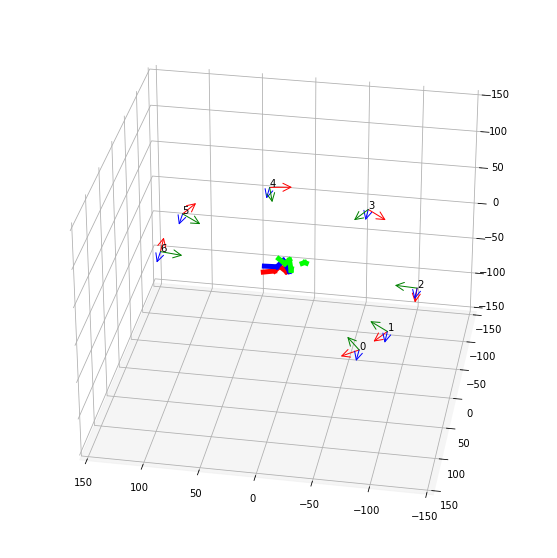

In [17]:
# visualize the camera network
fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(111, projection='3d')
camNet.draw(ax3d, size=20)
camNet.plot_3d(ax3d, img_id=0, size=10)
plt.xlim([-150, 150])
plt.ylim([-150, 150])
ax3d.set_zlim([-150, 150])
ax3d.view_init(30,100)